In [76]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical
from keras import regularizers
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np


Load the MNIST dataset

In [77]:
(train_data,train_target),(test_data,test_target) = mnist.load_data()

Visualize the dataset

Target labels:  [7 2 5 6 7 4 2 5 0 4]


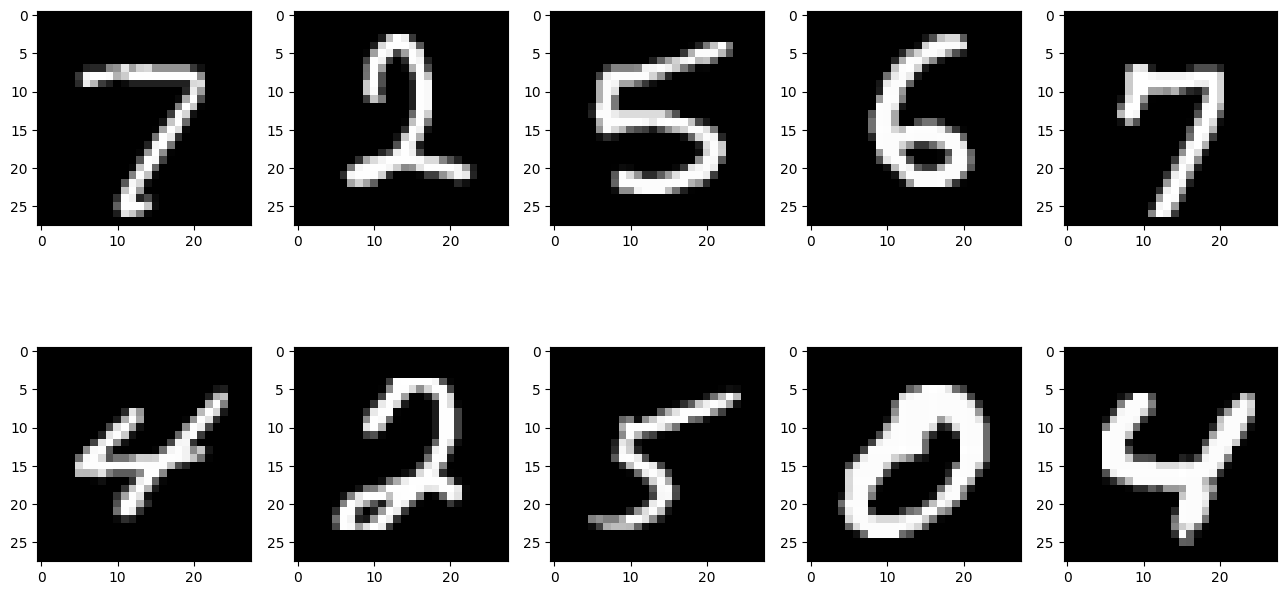

In [78]:
fig, axs = plt.subplots(2, 5, figsize=(16,8))
random_numbers = np.random.randint(0, 6000, 10)
print('Target labels: ',train_target[random_numbers])
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(train_data[random_numbers[idx]],cmap='gray')
plt.show()

Pre-processing stage

In [80]:
new_train_data = train_data/255.0
new_test_data=test_data/255.0

new_train_target = to_categorical(train_target)
new_test_target = to_categorical(test_target)


[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]] [5 0 4 ... 5 6 8]


Create the Model architecture

In [91]:
model=Sequential()

model.add(Flatten(input_shape=(28,28)))


model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
model.add(Dense(64, input_dim=64, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
model.add(Dense(32, input_dim=64, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
model.add(Dense(10, input_dim=32, activation='softmax', kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))


model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [92]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_17 (Flatten)        (None, 784)               0         
                                                                 
 dense_75 (Dense)            (None, 64)                50240     
                                                                 
 dense_76 (Dense)            (None, 64)                4160      
                                                                 
 dense_77 (Dense)            (None, 32)                2080      
                                                                 
 dense_78 (Dense)            (None, 10)                330       
                                                                 
Total params: 56,810
Trainable params: 56,810
Non-trainable params: 0
_________________________________________________________________


Train the model

In [93]:
train_info = model.fit(new_train_data , new_train_target , epochs = 15)

Epoch 1/15
1875/1875 [==============================] - 8s 3ms/step - loss: 1.2742 - accuracy: 0.8786
Epoch 2/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.8540 - accuracy: 0.9199
Epoch 3/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7512 - accuracy: 0.9296
Epoch 4/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6992 - accuracy: 0.9326
Epoch 5/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6635 - accuracy: 0.9356
Epoch 6/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6353 - accuracy: 0.9380
Epoch 7/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6216 - accuracy: 0.9375
Epoch 8/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6104 - accuracy: 0.9394
Epoch 9/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6008 - accuracy: 0.9411
Epoch 10/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.593

Plot the loss and accuracy graphs

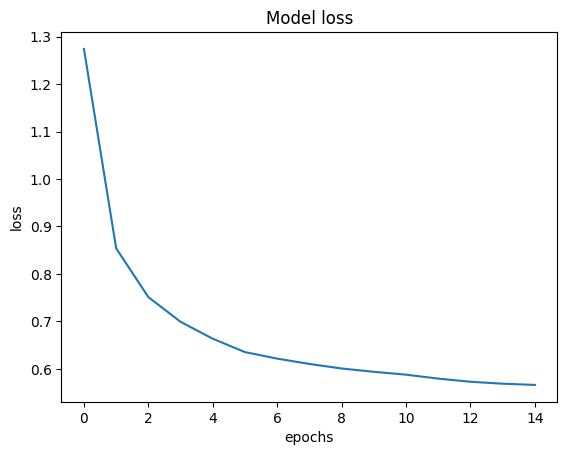

In [94]:
plt.plot(train_info.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model loss')
plt.show()

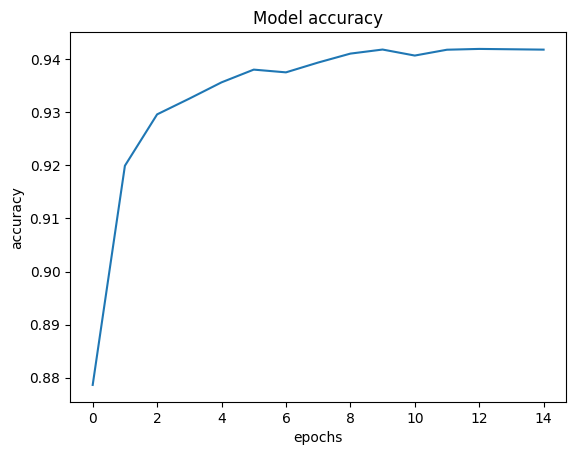

In [95]:
plt.plot(train_info.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.show()

Test the performance of Model

In [96]:
loss, acc = model.evaluate(new_test_data , new_test_target)
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')

313/313 [==============================] - 1s 2ms/step - loss: 0.5475 - accuracy: 0.9454
Loss of the Test dataset is: 0.5474808812141418
Accuracy of the test dataset is: 0.9453999996185303


Visualize class-wise test dataset performance using a confusion matrix

In [105]:
from sklearn.metrics import confusion_matrix
# Confusion matrix


y_pred = model.predict(new_test_data)
y_pred = np.argmax(y_pred, axis=0)
cm = confusion_matrix(new_test_target, y_pred)
plt.imshow(cm, cmap='Blues')
plt.title('Confusion matrix')
plt.colorbar()
plt.show()

313/313 [==============================] - 1s 2ms/step


ValueError: ignored

Save the model weights

In [97]:
model.save_weights('MNIST_WEIGHTS_V1.h5')